In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Package

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

## Menampilkan Gambar

In [60]:
image = Image.open("/content/drive/MyDrive/image/ikan_bandeng.jpg")

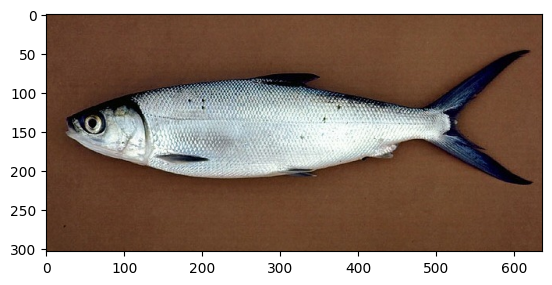

In [61]:
plt.imshow(image)
plt.show()

In [62]:
pixel_array = np.array(image)

print("Image Shape:", pixel_array.shape)
print(pixel_array)

Image Shape: (304, 636, 3)
[[[ 91  55  33]
  [ 99  63  41]
  [ 96  60  38]
  ...
  [109  67  45]
  [112  67  46]
  [112  67  46]]

 [[ 95  59  37]
  [100  64  42]
  [ 97  61  39]
  ...
  [109  67  45]
  [113  68  47]
  [113  68  47]]

 [[ 98  62  40]
  [ 98  62  40]
  [ 97  61  39]
  ...
  [111  69  47]
  [112  70  48]
  [113  71  49]]

 ...

 [[ 87  55  34]
  [ 85  53  32]
  [ 84  52  31]
  ...
  [ 94  56  35]
  [ 92  54  33]
  [ 91  53  32]]

 [[ 89  57  36]
  [ 85  53  32]
  [ 83  51  30]
  ...
  [102  64  43]
  [102  64  43]
  [101  63  42]]

 [[ 88  56  35]
  [ 84  52  31]
  [ 82  50  29]
  ...
  [ 98  60  39]
  [101  63  42]
  [103  65  44]]]


## Pelembutan Citra (Image Smoothing)

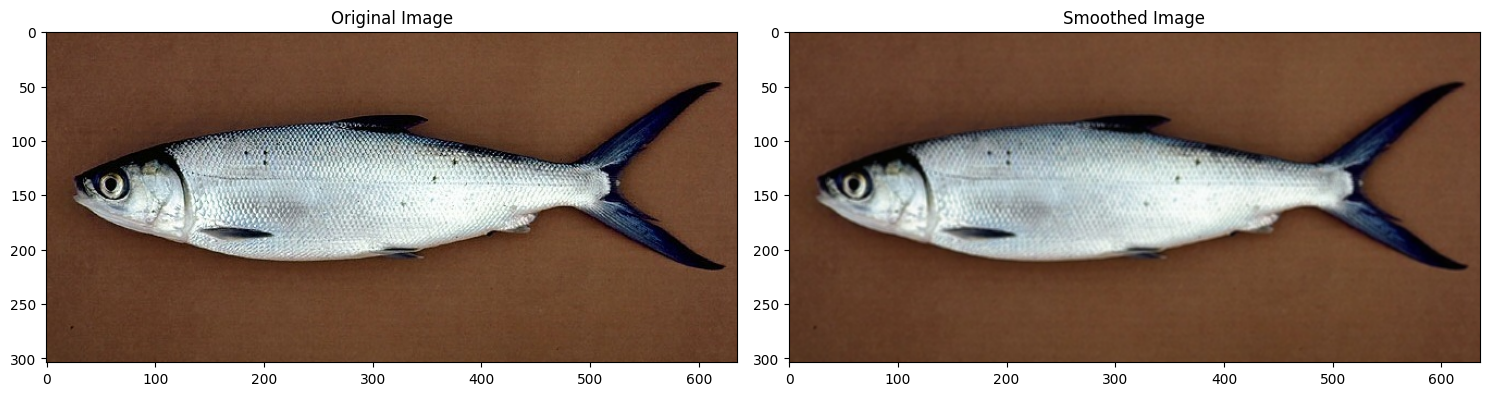

In [63]:
kernel = np.array([[1/9, 1/9, 1/9],
                   [1/9, 1/9, 1/9],
                   [1/9, 1/9, 1/9]])

padded_image = np.pad(pixel_array, ((1, 1), (1, 1), (0, 0)), mode='edge')

smoothed_image = np.zeros_like(pixel_array)

for i in range(pixel_array.shape[0]):
    for j in range(pixel_array.shape[1]):
        neighborhood = padded_image[i:i+3, j:j+3]

        smoothed_pixel = np.sum(neighborhood * kernel, axis=(0, 1))

        smoothed_image[i, j] = smoothed_pixel.astype(np.uint8)

plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
plt.imshow(image)
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(smoothed_image)
plt.title("Smoothed Image")

plt.tight_layout()
plt.show()

In [64]:
smoothed_image_array = np.array(smoothed_image)

print("Image Shape:", smoothed_image_array.shape)
print(smoothed_image_array)

Image Shape: (304, 636, 3)
[[[ 94  58  36]
  [ 95  59  38]
  [ 96  60  38]
  ...
  [109  66  45]
  [111  67  45]
  [112  67  46]]

 [[ 96  60  38]
  [ 96  60  38]
  [ 96  60  38]
  ...
  [110  67  45]
  [111  68  46]
  [112  68  47]]

 [[ 96  60  38]
  [ 96  60  38]
  [ 96  60  38]
  ...
  [110  68  46]
  [112  69  47]
  [113  70  48]]

 ...

 [[ 86  54  33]
  [ 85  53  32]
  [ 84  52  31]
  ...
  [ 97  59  38]
  [ 97  59  38]
  [ 97  59  38]]

 [[ 86  54  33]
  [ 85  53  32]
  [ 84  52  31]
  ...
  [ 97  59  38]
  [ 98  60  39]
  [ 98  60  39]]

 [[ 86  54  34]
  [ 84  53  31]
  [ 83  51  30]
  ...
  [ 99  61  40]
  [100  62  41]
  [102  63  42]]]


## Median Filtering pada Gambar

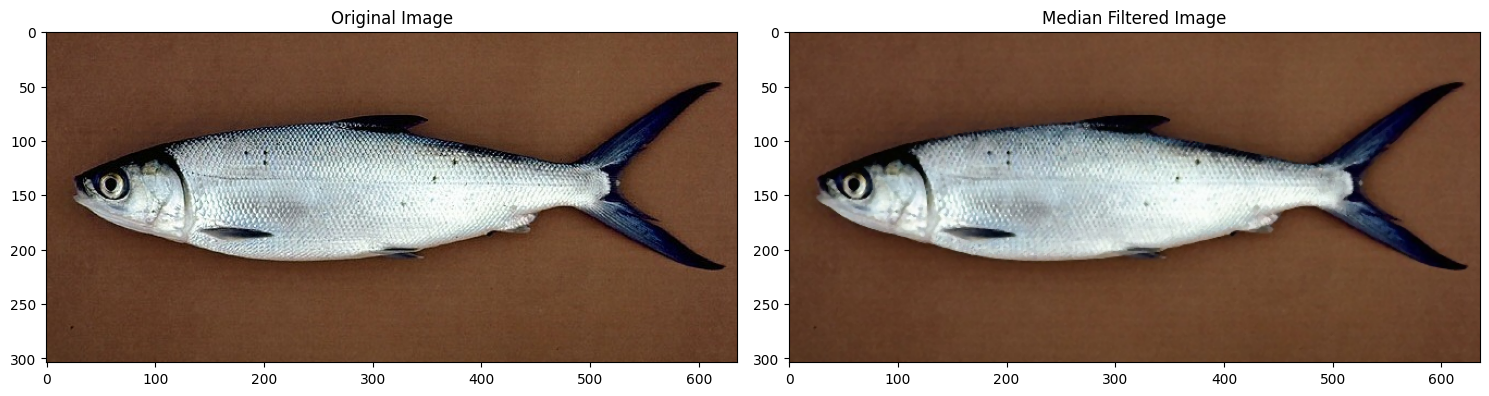

In [65]:
import numpy as np
from PIL import Image

def median_filter(image_array, kernel_size=3):
    padded_image = np.pad(image_array, ((kernel_size//2, kernel_size//2), (kernel_size//2, kernel_size//2), (0, 0)), mode='edge')
    filtered_image = np.zeros_like(image_array)

    for i in range(image_array.shape[0]):
        for j in range(image_array.shape[1]):
            neighborhood = padded_image[i:i+kernel_size, j:j+kernel_size]
            median_pixel = np.median(neighborhood.reshape(-1, 3), axis=0)
            filtered_image[i, j] = median_pixel.astype(np.uint8)

    return filtered_image

filtered_image = median_filter(pixel_array)


plt.figure(figsize=(15, 15))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(filtered_image)
plt.title("Median Filtered Image")


plt.tight_layout()
plt.show()


## Penajaman Citra (Image Sharpening)

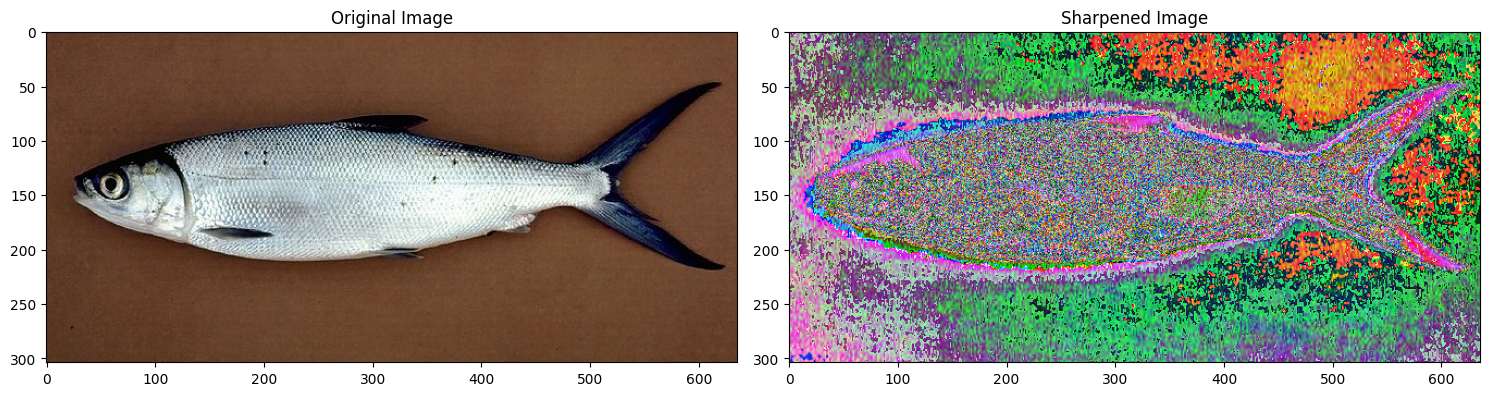

In [66]:
sharpening_kernel = np.array([[-1, -1, -1],
                              [-1, 9, -1],
                              [-1, -1, -1]])

padded_image = np.pad(pixel_array, ((1, 1), (1, 1), (0, 0)), mode='edge')

sharpened_image = np.zeros_like(pixel_array)

for i in range(pixel_array.shape[0]):
    for j in range(pixel_array.shape[1]):
        neighborhood = padded_image[i:i+3, j:j+3]
        sharpened_pixel = np.sum(neighborhood * sharpening_kernel, axis=(0, 1))
        sharpened_image[i, j] = sharpened_pixel.astype(np.uint8)

plt.figure(figsize=(15, 15))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(sharpened_image)
plt.title("Sharpened Image")

plt.tight_layout()
plt.show()
